YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0344
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 9.7945e-04
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 6.8236e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 6.8625e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.1727e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.2050e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.8938e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7039e-04
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.9765e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.9584e-04
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Mean Squared Error (MSE): 10.741675863944801
Root Mean Squared Error (RMSE): 3.277449597468251
Mean Absolute Error (MAE): 2.0386771347090513
R² Score: 0.992707186564277


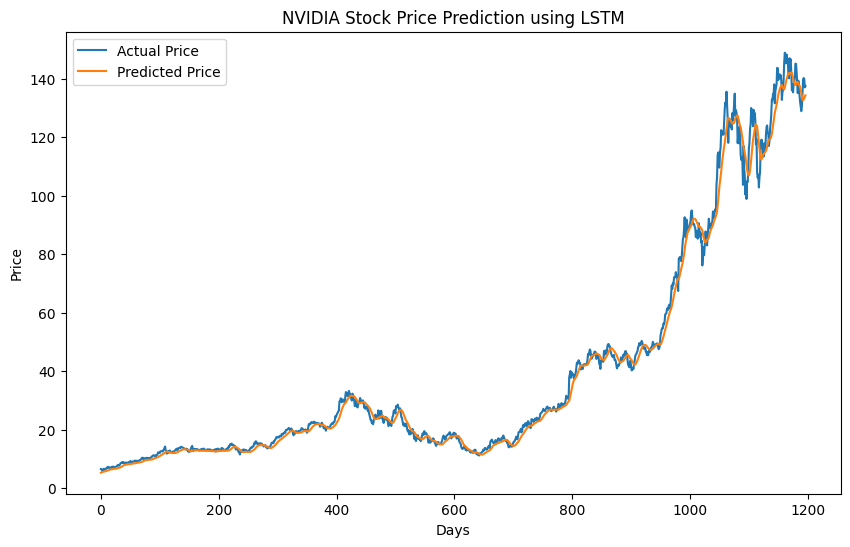

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Load NVIDIA (NVDA) stock data
data = yf.download('NVDA', start='2020-01-01', end='2024-12-31')
close_prices = data['Close'].values.reshape(-1, 1)

# Step 2: Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)

# Step 3: Create sequences (60 days history → 1 day prediction)
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Reshape input to LSTM expected format [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 4: Build LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='tanh', return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Step 6: Predict and plot
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y)

# Step 7: Calculate evaluation metrics
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Step 8: Plot results
plt.figure(figsize=(10,6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title("NVIDIA Stock Price Prediction using LSTM")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()